In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
#  # create a 3D array of size 3x3x4 starting from (0,0,0)
# x, y, z = np.indices((4, 3, 4))

# cube_1 = (z == 3) & (1 <= x) & (0 <= y) 
# cube_2 = (z == 2) & (1 <= x) & (0 <= y)
# cube_3 = (z == 1) & (1 <= x) & (0 <= y)
# cube_4 = (z == 0) & (1 <= x) & (0 <= y)

# update_1 = (z == 2) & (x == 2) & (y == 1)
# update_2 = (z == 1) & (x == 2) & (y == 1)
# update_3 = (z == 0) & (x == 2) & (y == 1)


# # set the colors of each object
# colors = np.empty(x.shape, dtype=object)
# # you can set colors based on certain conditions, here I'm setting random colors
# colors = np.random.choice(['blue'], size=x.shape)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# cubes = [cube_1, cube_2, cube_3, cube_4]
# updates = [update_1, update_2, update_3]

# def update(frame):
#     ax.clear()
#     if frame < 4:
#         ax.voxels(x, facecolors=colors, edgecolor='k', alpha=0.1, linewidth=0.4)
#         ax.voxels(cubes[frame], facecolors='red', edgecolor='k', alpha=0.2, linewidth=0.2)
#         if frame != 3:
#             ax.voxels(updates[frame], facecolors='red', edgecolor='k', alpha=0.8, linewidth=0.2)
#     else:
#         ax.voxels(x, facecolors=colors, edgecolor='k', alpha=0.1, linewidth=0.4)


# ani = FuncAnimation(fig, update, frames=np.arange(0, 5), interval=1000, repeat=False)
# ani.save('voxel_animation.gif', writer='imagemagick', fps=1)
# plt.show()

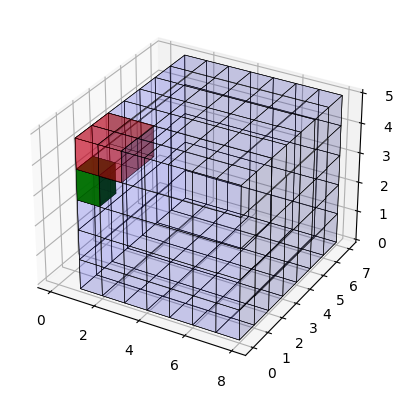

In [3]:
 # create a 3D array of size 3x3x4 starting from (0,0,0)
x, y, z = np.indices((8, 7, 5))

# set the colors of each object
colors = np.empty(x.shape, dtype=object)
# you can set colors based on certain conditions, here I'm setting random colors
colors = np.random.choice(['blue'], size=x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def create_cubes(x, y, z):
    cubes = []
    shits = []
    for k in range(4,0,-1):
        for j in range(7):
            for i in range(7):
                if j == 0 or j == 6:
                    if i == 0:
                        cube = (z == k) & (i+1 <= x) & (x <= i+2) & (j-1 <= y)  & (y <= j+1)
                        shit = (z == k-1) & (x == i + 1) & (y == j)
                    else:
                        cube = (z == k) & (i <= x) & (x <= i+2) & (j-1 <= y)  & (y <= j+1)
                        shit = (z == k-1) & (x == i + 1) & (y == j)
                else:
                    if i == 0:
                        cube = (z == k) & (i+1 <= x) & (x <= i+2) & (j-1 <= y)  & (y <= j+1)
                        shit = (z == k-1) & (x == i + 1) & (y == j)
                    else:
                        cube = (z == k) & (i <= x) & (x <= i+2) & (j-1 <= y)  & (y <= j+1)
                        shit = (z == k-1) & (x == i + 1) & (y == j)
                cubes.append(cube)
                shits.append(shit)
    
    return cubes,shits

cubes,shits = create_cubes(x, y, z)

def update(frame):
    ax.clear()
    if frame < len(cubes):
        ax.voxels(x, facecolors=colors, edgecolor='k', alpha=0.1, linewidth=0.4)
        ax.voxels(cubes[frame], facecolors='red', edgecolor='k', alpha=0.35, linewidth=0.2)
        ax.voxels(shits[frame], facecolors='green', edgecolor='k', alpha=0.8, linewidth=0.2)
    else:
        ax.voxels(x, facecolors=colors, edgecolor='k', alpha=0.1, linewidth=0.4)


ani = FuncAnimation(fig, update, frames=np.arange(0, len(cubes)), interval=1000, repeat=False)
ani.save('test.gif', writer='imagemagick', fps=6)

# plt.show()
